In [1]:
from sklearn.model_selection import GridSearchCV
from thundersvm import SVC
import pandas as pd
from IPython.display import clear_output
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,recall_score
import pickle

In [2]:
train_X=pd.read_csv('dataset/train_X.csv')
test_X=pd.read_csv('dataset/test_X.csv')

train_y=pd.read_csv('dataset/train_y.csv')
test_y=pd.read_csv('dataset/test_y.csv')

SVM with Poly Kernel

In [3]:
def SVM_selector_poly(X,Y):
           
    model=SVC(n_jobs=-1)
    properties={'C':[0.1,0.5,1,10],'kernel':['polynomial'],'degree':[2],'gamma':['scale','auto']}
    
    grid=GridSearchCV(model,properties,scoring="accuracy",cv=10,return_train_score=True,verbose=5)
    grid.fit(X,Y.values.ravel())
    
    clear_output(wait=True)
    
    result=pd.DataFrame(grid.cv_results_)
    
    print ("Best Score: ", grid.best_score_)
    print ("Best Params: ", grid.best_params_)
    
    return grid.best_estimator_,result


In [4]:
best_model,result=SVM_selector_poly(train_X,train_y)

Best Score:  0.9562666666666667
Best Params:  {'C': 10, 'degree': 2, 'gamma': 'auto', 'kernel': 'polynomial'}


In [5]:
if 'best_model' in globals():
    
    model_filename = 'models/best_model_poly.sav'
    pickle.dump(best_model, open(model_filename, 'wb'))

    result_filename = 'models/result_poly.sav'
    pickle.dump(result, open(result_filename, 'wb'))

else:
    import pickle
    
    from thundersvm import SVC
    import pandas as pd
    
    from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,recall_score
    
    
    train_X=pd.read_csv('dataset/train_X.csv')
    test_X=pd.read_csv('dataset/test_X.csv')

    train_y=pd.read_csv('dataset/train_y.csv')
    test_y=pd.read_csv('dataset/test_y.csv')


    with open( "models/best_model_poly.sav", "rb" ) as f:
        best_model = pickle.load(f)
    
    with open( "models/result_poly.sav", "rb" ) as f:
        result = pickle.load(f)

In [10]:
result[["param_C","param_gamma","mean_test_score","mean_train_score"]]

,param_C,param_gamma,mean_test_score,mean_train_score
0,0.1,scale,NaN,NaN
1,0.1,auto,0.696133,0.697624
2,0.5,scale,NaN,NaN
3,0.5,auto,0.884567,0.885854
4,1,scale,NaN,NaN
5,1,auto,0.911600,0.913089
6,10,scale,NaN,NaN
7,10,auto,0.956267,0.960922


In [7]:
pred_y=best_model.predict(test_X)

accuracy_score(test_y,pred_y)

0.9548

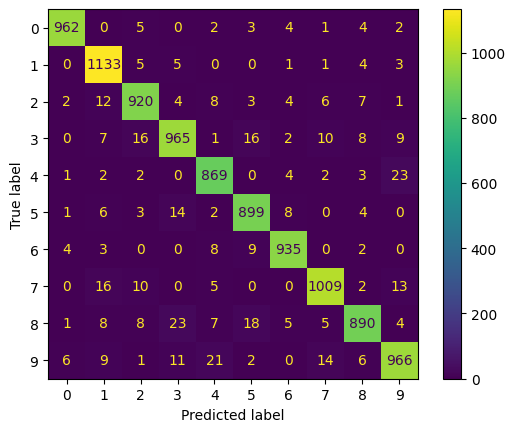

In [8]:
cm = confusion_matrix(test_y, pred_y, labels=[x for x in range(10)])
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[x for x in range(10)]).plot()